### AUTHOR : VAISHNAV KRISHNA P
#### DATASET SOURCE: UCI MICHINE LEARNING REPOSITORY
#### DATASET LINK: https://archive.ics.uci.edu/dataset/73/mushroom

In [600]:
# importing necessory libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
,

# setting the print option
pd.set_option("display.max_columns",None)

# ignoring the unnecessory warnings 
import warnings
warnings.filterwarnings(action='ignore')

# necessory feature for feature transformation
from sklearn.preprocessing import MinMaxScaler

# Train test split of dataset 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# joblib module 
import joblib

In [601]:
# importing dataset
feature_names =["Poisinous",'cap-shape','cap_surface','cap_color','bruises','odor','gill-attachment',
                'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',
                'stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring',
               'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type',
               'spore-print-color','population','habitat']
df = pd.read_csv("agaricus-lepiota.data",names= feature_names)
data = df.copy()

In [602]:
# randomly 5 rows in data frame 
df.sample(n=5)

,Poisinous,cap-shape,cap_surface,cap_color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1602,e,f,f,w,f,n,f,w,b,k,t,e,s,f,w,w,p,w,o,e,n,s,g
7187,p,k,y,n,f,s,f,c,n,b,t,?,s,s,w,w,p,w,o,e,w,v,d
185,p,x,y,w,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,g
4973,p,f,f,g,f,f,f,c,b,p,e,b,k,k,n,b,p,w,o,l,h,v,d
3435,p,x,f,g,f,c,f,w,n,g,e,b,s,s,w,w,p,w,o,p,n,v,d


In [603]:
# shape of the dataframe 
df.shape

(8124, 23)

In [604]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Poisinous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [605]:
# description about the dataset 
df.describe(include='all')

,Poisinous,cap-shape,cap_surface,cap_color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [606]:
# checking whether there is any duplicated rows
df.duplicated().sum()

0

* Brief about the dataset:
1. Dataset is clean, there is no missing values
2. Dataset contains 8123 rows and 23 columns 
3. All the features are categorical 
4. There is no duplicate values 

### EDA 
1. Feature Analysis 
2. Missing value analysis 
3. Numerical features and its analysis 
4. Categorical features and its analysis 
5. Corelation analysis 
6. Group by analysis 

#### FEATURE ANALYSIS 

In [607]:
# column name of each features 
df.columns

Index(['Poisinous', 'cap-shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

#### ABOUT THE DATSET FEATURES:
1. Posionous:(Target feature) - Categorical
2. cap-surface: - Categorical
3. cap-color: - categorial
4. bruises : a common cause of mushroom discolouration leading to a reduction in quality and loss of marketable fresh product - catgorical 
5. odor - categoriacal features 
6. gill attachment : categorical features
7. gill spacing : categorical features 
8. gill-size : categorical features 
9. gill-color: categorical features 
10. stalk-shape: categorial features 
11. stalk-root: categoricalfeatures 
12. stalk-surface-above-ring: categorical features
13. stalk-surface-above-ring: c
14. stalk-surface-below-ring: c
15. stalk-color-above-ring: c 
16. veil-type: c 
17. veil-color: c
18. ring-number: c
19. ring-type: c
20. spore-print-color: c
21. population: c
22. habitat: c

#### MISSING VALUE ANALYSIS 

In [608]:
# checking no of missing values in each columns 
df.isna().sum()

Poisinous                   0
cap-shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:>

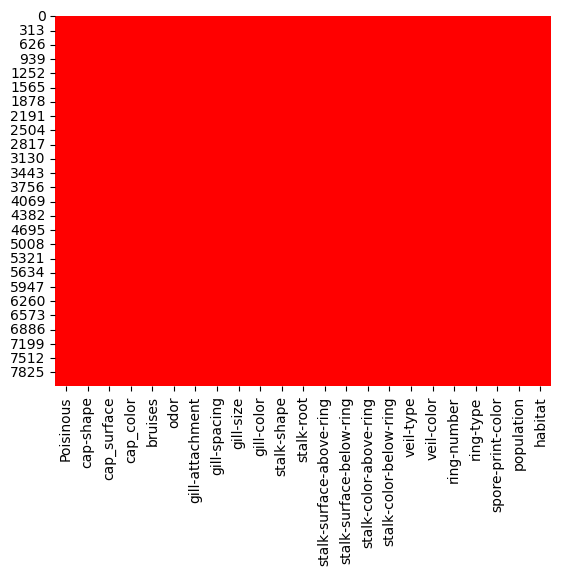

In [609]:
# visualisation of missing values in each column using heatmap 
sns.heatmap(df.isnull(),cbar=False,linewidth=0.5,linecolor='r')

* There is no missing values in the dataset.
* There is no numerical features 

#### CATEGORICAL FEATURE ANALYSIS 

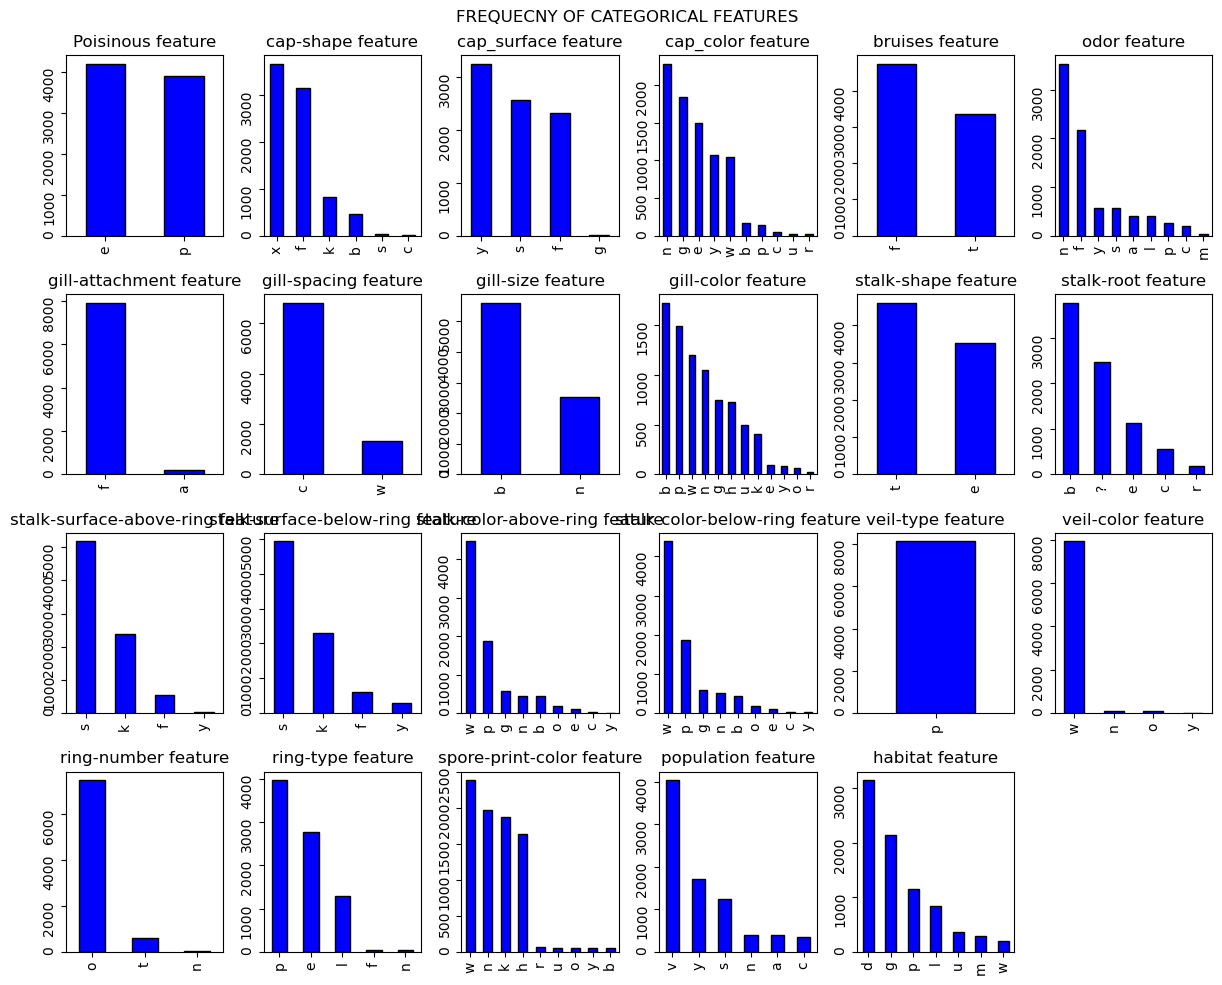

In [610]:
# using Bar plot for distribution of Categorical features 
plt.figure(figsize=(12,10))
plt.suptitle("FREQUECNY OF CATEGORICAL FEATURES")
c = 1

for feature in df.columns:
    plt.subplot(4,6,c)
    c += 1
    df[feature].value_counts().plot(kind='bar',color='b',edgecolor='k',title=f"{feature} feature")
    plt.yticks(rotation=90)
plt.tight_layout()
plt.show()

In [611]:
df['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [612]:
df['Poisinous'].value_counts()

e    4208
p    3916
Name: Poisinous, dtype: int64

In [613]:
df['gill-attachment'].value_counts()

f    7914
a     210
Name: gill-attachment, dtype: int64

In [614]:
df['ring-type'].value_counts()

p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64

* Informations:
1. Target feature is balanced 
2. veil type feature contain only one categorical featureso,doesnot 
play any importance in prediction
3. have to Encode categorical features in numberical features 
* Since the dataset doesnot contain any of the numerical features, there is no need of the outlier analysis 
* Groupby analysis also will works after encoding 

### DATA PREPRATION
1. DATA CLEANING 
2. DATA TRANSFORMATION
3. CORELATION ANALYSIS 
4. GROUP BY ANALYSIS 
5. DATA REDUCTION

* Since, there is no missing values no need of handling the missing values 

#### DATA TRANSFORMATION 

In [615]:
# Encoding using dictionary 
dictionary = {}

for feature in df.columns:
    unique_values = df[feature].unique()
    c = 1 
    dictionary[feature] = {}
    for category in unique_values:
        dictionary[feature][category] = c 
        c += 1

In [616]:
# printing dictinary 
dictionary

{'Poisinous': {'p': 1, 'e': 2},
 'cap-shape': {'x': 1, 'b': 2, 's': 3, 'f': 4, 'k': 5, 'c': 6},
 'cap_surface': {'s': 1, 'y': 2, 'f': 3, 'g': 4},
 'cap_color': {'n': 1,
  'y': 2,
  'w': 3,
  'g': 4,
  'e': 5,
  'p': 6,
  'b': 7,
  'u': 8,
  'c': 9,
  'r': 10},
 'bruises': {'t': 1, 'f': 2},
 'odor': {'p': 1,
  'a': 2,
  'l': 3,
  'n': 4,
  'f': 5,
  'c': 6,
  'y': 7,
  's': 8,
  'm': 9},
 'gill-attachment': {'f': 1, 'a': 2},
 'gill-spacing': {'c': 1, 'w': 2},
 'gill-size': {'n': 1, 'b': 2},
 'gill-color': {'k': 1,
  'n': 2,
  'g': 3,
  'p': 4,
  'w': 5,
  'h': 6,
  'u': 7,
  'e': 8,
  'b': 9,
  'r': 10,
  'y': 11,
  'o': 12},
 'stalk-shape': {'e': 1, 't': 2},
 'stalk-root': {'e': 1, 'c': 2, 'b': 3, 'r': 4, '?': 5},
 'stalk-surface-above-ring': {'s': 1, 'f': 2, 'k': 3, 'y': 4},
 'stalk-surface-below-ring': {'s': 1, 'f': 2, 'y': 3, 'k': 4},
 'stalk-color-above-ring': {'w': 1,
  'g': 2,
  'p': 3,
  'n': 4,
  'b': 5,
  'e': 6,
  'o': 7,
  'c': 8,
  'y': 9},
 'stalk-color-below-ring': {'w': 

In [617]:
# encoding using dictionary 
for feature in df.columns:
    df[feature] = df[feature].map(dictionary[feature])

In [618]:
# random 5 sample rows
df.sample(n=5)

,Poisinous,cap-shape,cap_surface,cap_color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5121,1,4,1,7,1,5,1,1,2,4,2,3,1,1,1,1,1,1,1,1,4,4,2
5421,2,1,1,5,1,4,1,1,2,5,1,5,1,1,1,6,1,1,2,2,5,6,6
38,2,1,3,2,1,2,1,2,1,4,2,3,1,1,1,1,1,1,1,1,2,4,4
2861,2,4,2,1,1,4,1,1,2,5,2,3,1,1,3,2,1,1,1,1,1,4,4
6692,1,4,1,1,2,7,1,1,1,9,2,5,1,4,3,1,1,1,1,2,5,4,4


#### CORELATION ANALYSIS 

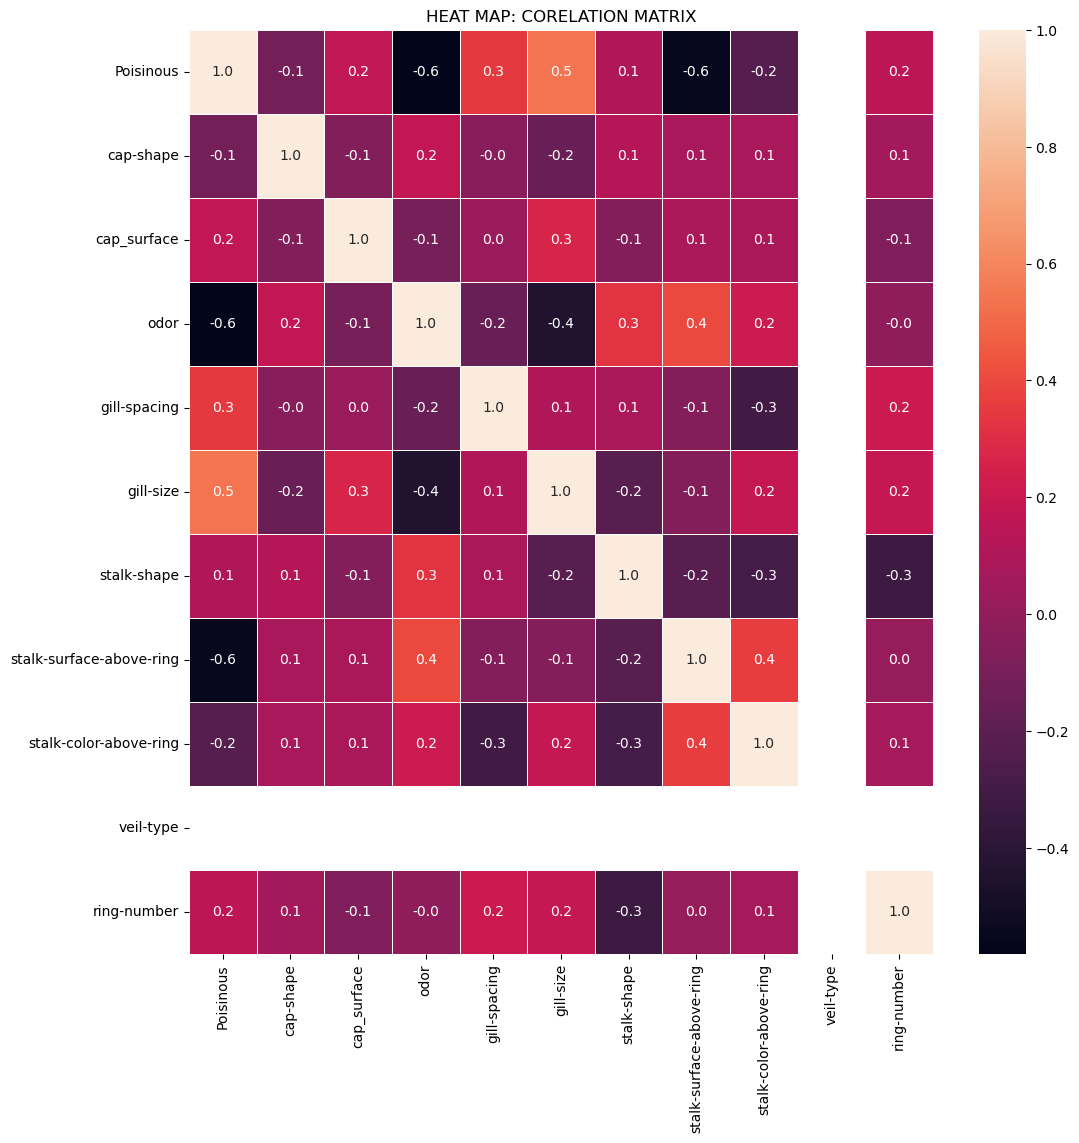

In [644]:
# plotting the corelation Matrix using corelation Matrix 
plt.figure(figsize=(12,12))
plt.title("HEAT MAP: CORELATION MATRIX")
sns.heatmap(df.corr(),annot=True,cbar=True,linewidth=0.5,fmt='0.1f')
plt.show()

In [620]:
# features with equal to or more than 0.4 with target feature 
imp_features = {}

for index,corelation in zip(df.corr().index,df.corr()['Poisinous']):
    if abs(corelation) >= 0.4 and index != 'Poisinous':
        imp_features[index] = corelation

In [621]:
# Printing important features 
imp_features

{'bruises': -0.5015303774075582,
 'odor': -0.5820154327236088,
 'gill-size': 0.5400243574330149,
 'gill-color': -0.41286942564165174,
 'stalk-surface-above-ring': -0.5520436410013904,
 'stalk-surface-below-ring': -0.5324522904205192,
 'ring-type': -0.5565147182889648,
 'spore-print-color': -0.5607152345831539}

In [622]:
# multicolinear features more than 0.7
for r_feature in df.columns[1:]:
    for c_feature in df.columns[1:]:
        corelation = df[r_feature].corr(df[c_feature])
        if abs(corelation) >= 0.7 and r_feature != c_feature :
            print("{}:{} - corr: {}".format(r_feature,c_feature,corelation))

gill-attachment:veil-color - corr: 0.8422295838327004
stalk-root:spore-print-color - corr: 0.7243143659840253
stalk-color-above-ring:stalk-color-below-ring - corr: 0.711672496698273
stalk-color-below-ring:stalk-color-above-ring - corr: 0.7116724966982729
veil-color:gill-attachment - corr: 0.8422295838327004
spore-print-color:stalk-root - corr: 0.7243143659840253


#### GROUP BY ANALYSIS 

In [623]:
# group by analysis of poisinous 
df.groupby('Poisinous').mean()

,cap-shape,cap_surface,cap_color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
Poisinous,,,,,,,,,,,,,,,,,,,,,,
1,2.822268,1.835546,3.169561,1.840654,5.529111,1.004597,1.028601,1.432074,6.416752,1.514811,3.756895,2.180797,2.730337,2.514811,2.229826,1.0,1.006129,1.036772,2.150153,4.213483,3.910112,4.115424
2,2.465779,2.098859,3.022814,1.346008,3.714829,1.045627,1.285171,1.931559,4.211027,1.615970,2.855513,1.176806,1.309886,1.809886,1.904943,1.0,1.068441,1.125475,1.273764,2.258555,3.480989,3.496198


#### DATA REDUCTION 

In [624]:
# Finding features to remove 
features_not_required = ['veil-color']
unimp_features = []
multicolinear_features = ['stalk-color-below-ring','stalk-root','bruises','ring-type','gill-color',
                          'stalk-surface-below-ring','population','habitat','gill-attachment','spore-print-color']

for index,corelation in zip(df.corr().index,df.corr()['Poisinous']):
    if abs(corelation) <= 0.1 and index != 'Poisinous':
        unimp_features.append(index)

In [625]:
# features which are less corelated with the Target feature
unimp_features

['cap_color', 'stalk-color-below-ring']

In [626]:
# Features which are less important x
df.corr()['Poisinous'][abs(df.corr()['Poisinous']) <= 0.1]

cap_color                -0.042028
stalk-color-below-ring   -0.098476
Name: Poisinous, dtype: float64

In [627]:
# combining all the features to be removed 
features_to_be_removed = features_not_required + unimp_features + multicolinear_features
features_to_be_removed

['veil-color',
 'cap_color',
 'stalk-color-below-ring',
 'stalk-color-below-ring',
 'stalk-root',
 'bruises',
 'ring-type',
 'gill-color',
 'stalk-surface-below-ring',
 'population',
 'habitat',
 'gill-attachment',
 'spore-print-color']

In [628]:
# Removing the duplicates while combining 
features_to_be_removed = set(features_to_be_removed)
features_to_be_removed = list(features_to_be_removed)

In [629]:
# Final features to be removed 
features_to_be_removed

['population',
 'ring-type',
 'stalk-color-below-ring',
 'gill-color',
 'stalk-root',
 'bruises',
 'veil-color',
 'habitat',
 'stalk-surface-below-ring',
 'gill-attachment',
 'spore-print-color',
 'cap_color']

In [630]:
# Removing the unnecessory features 
df.drop(columns=features_to_be_removed,inplace=True)

In [631]:
df.tail()

,Poisinous,cap-shape,cap_surface,odor,gill-spacing,gill-size,stalk-shape,stalk-surface-above-ring,stalk-color-above-ring,veil-type,ring-number
8119,2,5,1,4,1,2,1,1,7,1,1
8120,2,1,1,4,1,2,1,1,7,1,1
8121,2,4,1,4,1,2,1,1,7,1,1
8122,1,5,2,7,1,1,2,1,1,1,1
8123,2,1,1,4,1,2,1,1,7,1,1


In [632]:
df.shape

(8124, 11)

#### DATA TRANSFORMATION

In [633]:
# Splitting target feature and other features 
X = df.drop(columns=['Poisinous'])
y = df['Poisinous']

* Transformation Not required 

In [634]:
X.head()

,cap-shape,cap_surface,odor,gill-spacing,gill-size,stalk-shape,stalk-surface-above-ring,stalk-color-above-ring,veil-type,ring-number
0,1,1,1,1,1,1,1,1,1,1
1,1,1,2,1,2,1,1,1,1,1
2,2,1,3,1,2,1,1,1,1,1
3,1,2,1,1,1,1,1,1,1,1
4,1,1,4,2,2,2,1,1,1,1


#### TRAIN TEST SPLIT 

In [635]:
# Train test split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [636]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6499, 10), (1625, 10), (6499,), (1625,))

#### MODEL TRAINING AND TESTING 

Accuracy: 0.9950769230769231


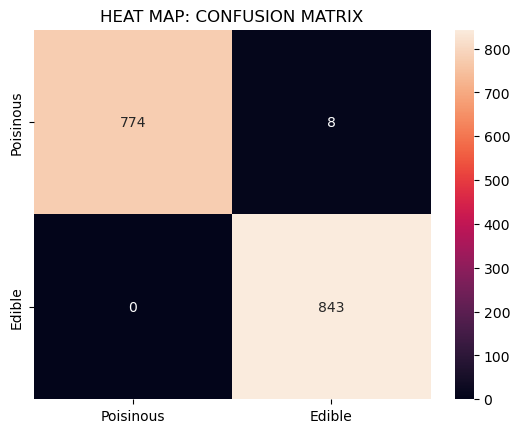

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       782
           2       0.99      1.00      1.00       843

    accuracy                           1.00      1625
   macro avg       1.00      0.99      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [650]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# saving the model in joblib 
joblib.dump(rf_classifier,'rf_Mushroom_Classifier.joblib')

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.title("HEAT MAP: CONFUSION MATRIX")
sns.heatmap(conf_matrix,annot=True,fmt='0.0f')
plt.xticks([0.5,1.5],['Poisinous','Edible'])
plt.yticks([0.5,1.5],['Poisinous','Edible'])
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

#### PREDICTION SYSTEM

In [643]:
# Making a prediction System
rf_classifier = joblib.load('rf_Mushroom_Classifier.joblib')

values = [np.array([1,3,5,1,2,1,3,3,1,1])]

prediction = rf_classifier.predict(values)

if prediction == 1:
    print("MUSHROOOM IS CLASSFIED AS POISINOUS")
else:
    print("MUSHROOM IS CLASSIFIED AS EDIBLE")

MUSHROOOM IS CLASSFIED AS POISINOUS
